In [4]:
import csv
import random
from faker import Faker
from datetime import datetime

# Create a Faker instance
fake = Faker()

# Define the number of records to generate
num_records = 10000
product_categories = [
    'Electronics', 'Clothing', 'Home & Kitchen', 'Sports & Outdoors',
    'Books', 'Toys & Games', 'Health & Personal Care', 'Automotive',
    'Beauty & Personal Care', 'Office Products', 'pen', 'pencil'
]
payment_types = ['Card', 'Internet Banking', 'UPI', 'Wallet']
countries = {
    'India': ['Mumbai', 'Delhi', 'Bengaluru', 'Chennai', 'Kolkata'],
    'USA': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Boston'],
    'UK': ['London', 'Manchester', 'Birmingham', 'Leeds', 'Oxford'],
    'Germany': ['Berlin', 'Munich', 'Frankfurt', 'Hamburg', 'Stuttgart']
}
websites = ['www.amazon.com', 'www.flipkart.com', 'www.ebay.in', 'www.tatacliq.com', 'www.snapdeal.com']

# Open a CSV file to write the data
with open('E-Commerce data.csv', 'w', newline='', encoding='utf-8') as csvfile:
    # Define the CSV writer
    writer = csv.writer(csvfile)
    
    # Write the header row
    writer.writerow([
        'order_id', 'customer_id', 'customer_name', 'product_id', 'product_name', 'product_category', 
        'product_type', 'qty', 'price', 'datetime', 'country', 'city', 'ecommerce_website_name', 
        'payment_txn_id', 'payment_txn_success', 'failure_reason'
    ])
    
    # Generate and write each record
    for _ in range(num_records):
        order_id = fake.random_number(digits=6)
        customer_id = fake.random_number(digits=6)
        customer_name = fake.name()
        product_id = fake.random_number(digits=6)
        product_name = fake.word()
        product_category = random.choice(product_categories)
        product_type = random.choice(payment_types) 
        qty = random.randint(1, 1000)
        price = round(random.uniform(5.0, 1000.0), 2)
        datetime =fake.date_time_between(start_date='-1y', end_date='now').strftime("%Y-%m-%d %H:%M")
        country = random.choice(list(countries.keys()))
        city = random.choice(countries[country])
        ecommerce_website_name = random.choice(websites)
        payment_txn_id = fake.uuid4().split('-')[0]
        payment_txn_success = random.choice(['Y', 'N'])
        failure_reason = "" if payment_txn_success == 'Y' else "Invalid CVV."
        
        # Write the record to the CSV file
        writer.writerow([
            order_id, customer_id, customer_name, product_id, product_name, product_category,
            product_type, qty, price, datetime, country, city, ecommerce_website_name,
            payment_txn_id, payment_txn_success, failure_reason
        ])

print(f"{num_records} records have been generated and saved to 'E-Commerce data.csv'")


10000 records have been generated and saved to 'E-Commerce data.csv'


# EDA analysis

In [5]:
import pandas as jf

In [8]:
#Load the dataset
csv_data = jf.read_excel('E-Commerce data.xlsx')
print(csv_data)

      order_id  customer_id       customer_name  product_id product_name  \
0       150379       263531        Amanda Young      513909       listen   
1       443484       981915   Tiffany Carpenter      809016       though   
2       620631       373587           Amy Reese      539112         term   
3       797378       985308  Samantha Schneider      687004        offer   
4       811564        26966        Ashley Smith      378271        owner   
...        ...          ...                 ...         ...          ...   
9995    535711       983471       Cynthia Evans      454228        enjoy   
9996    777688       535220        Willie Huber      616483     continue   
9997    286482        95379     Jennifer Golden      261739        smile   
9998    358472        80354       David Pearson      861102         type   
9999    151104       490869        Linda Becker      520642     property   

            product_category      product_type  qty   price  \
0             Home & Kit

# 1)View Basic Information

In [10]:
 #View the first few rows of the dataset
print(csv_data.head(5))

   order_id  customer_id       customer_name  product_id product_name  \
0    150379       263531        Amanda Young      513909       listen   
1    443484       981915   Tiffany Carpenter      809016       though   
2    620631       373587           Amy Reese      539112         term   
3    797378       985308  Samantha Schneider      687004        offer   
4    811564        26966        Ashley Smith      378271        owner   

         product_category      product_type  qty   price            datetime  \
0          Home & Kitchen  Internet Banking  427  730.82 2023-10-12 06:40:00   
1  Beauty & Personal Care  Internet Banking  510  587.65 2024-06-06 09:04:00   
2                   Books              Card  464  357.73 2024-02-12 16:32:00   
3         Office Products            Wallet   50  854.87 2024-07-03 02:54:00   
4            Toys & Games  Internet Banking  505  720.84 2023-11-14 11:02:00   

   country         city ecommerce_website_name payment_txn_id  \
0      USA  Los

In [12]:
 #View basic information about the dataset
print(csv_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                10000 non-null  int64         
 1   customer_id             10000 non-null  int64         
 2   customer_name           10000 non-null  object        
 3   product_id              10000 non-null  int64         
 4   product_name            10000 non-null  object        
 5   product_category        10000 non-null  object        
 6   product_type            10000 non-null  object        
 7   qty                     10000 non-null  int64         
 8   price                   10000 non-null  float64       
 9   datetime                10000 non-null  datetime64[ns]
 10  country                 10000 non-null  object        
 11  city                    10000 non-null  object        
 12  ecommerce_website_name  10000 non-null  object 

In [14]:
# View summary statistics
print(csv_data.describe(include='all',datetime_is_numeric=True))

             order_id   customer_id   customer_name     product_id  \
count    10000.000000   10000.00000           10000   10000.000000   
unique            NaN           NaN            9333            NaN   
top               NaN           NaN  Jennifer Smith            NaN   
freq              NaN           NaN               9            NaN   
mean    503149.919600  501570.05060             NaN  497611.131000   
min        496.000000       4.00000             NaN     106.000000   
25%     250516.500000  248329.50000             NaN  248820.750000   
50%     506920.000000  504440.00000             NaN  497879.500000   
75%     757789.750000  754007.25000             NaN  746098.500000   
max     999935.000000  999612.00000             NaN  999998.000000   
std     291535.912708  290837.26508             NaN  288642.088121   

       product_name product_category product_type           qty         price  \
count         10000            10000        10000  10000.000000  10000.000000 

# 2)Check for Missing Values

In [15]:
print(csv_data.isnull().sum())

order_id                     0
customer_id                  0
customer_name                0
product_id                   0
product_name                 0
product_category             0
product_type                 0
qty                          0
price                        0
datetime                     0
country                      0
city                         0
ecommerce_website_name       0
payment_txn_id               0
payment_txn_success          0
failure_reason            4889
dtype: int64


# 3)Data Cleaning
# a) Handle Missing Values

In [17]:
# Drop rows with missing values
df_cleaned = csv_data.dropna()

In [19]:
# Fill missing values with a specific value
updated_data= csv_data.fillna(value={'failure_reason':'N/A'})
print(updated_data)

      order_id  customer_id       customer_name  product_id product_name  \
0       150379       263531        Amanda Young      513909       listen   
1       443484       981915   Tiffany Carpenter      809016       though   
2       620631       373587           Amy Reese      539112         term   
3       797378       985308  Samantha Schneider      687004        offer   
4       811564        26966        Ashley Smith      378271        owner   
...        ...          ...                 ...         ...          ...   
9995    535711       983471       Cynthia Evans      454228        enjoy   
9996    777688       535220        Willie Huber      616483     continue   
9997    286482        95379     Jennifer Golden      261739        smile   
9998    358472        80354       David Pearson      861102         type   
9999    151104       490869        Linda Becker      520642     property   

            product_category      product_type  qty   price  \
0             Home & Kit

In [20]:
updated_data.to_csv('cleaned_dataframe.csv', index=False)

In [21]:
updated_data.columns

Index(['order_id', 'customer_id', 'customer_name', 'product_id',
       'product_name', 'product_category', 'product_type', 'qty', 'price',
       'datetime', 'country', 'city', 'ecommerce_website_name',
       'payment_txn_id', 'payment_txn_success', 'failure_reason'],
      dtype='object')

# 2.Visualization

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

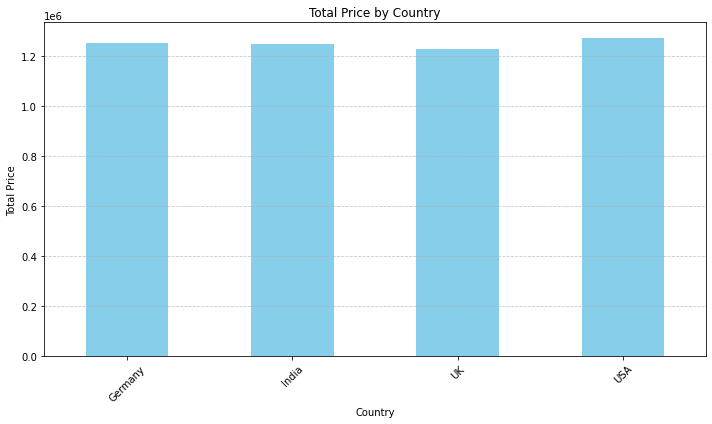

In [25]:
# Aggregating price by country
price_by_country = updated_data.groupby('country')['price'].sum()

# Plotting bar chart
plt.figure(figsize=(10, 6))
price_by_country.plot(kind='bar', color='skyblue')
plt.title('Total Price by Country')
plt.xlabel('Country')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

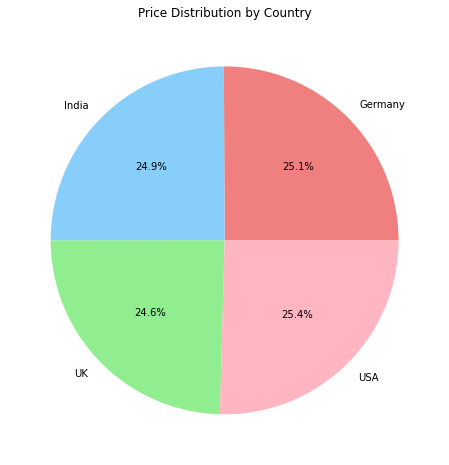

In [26]:
#create a pie chart
plt.figure(figsize=(8, 8))
price_by_country.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen', 'lightpink'])
plt.title('Price Distribution by Country')
plt.ylabel('')  # Hide the y-label
plt.show()

#Data Analysis Questions – Marketing Department

# 1. What is the top selling category of items? Per Country?

In [28]:
##Group by 'country' and 'product_category', then sum the 'qty'
category_sales = updated_data.groupby(['country', 'product_category'])['qty'].sum().reset_index()

# Find the top-selling category per country
top_category_per_country = category_sales.loc[category_sales.groupby('country')['qty'].idxmax()]

print(top_category_per_country)


    country        product_category     qty
9   Germany            Toys & Games  118821
23    India                  pencil  114353
27       UK                Clothing  110891
37      USA  Beauty & Personal Care  120854


# 2.How does the popularity of products change throughout the year? Per Country?

In [32]:
updated_data['year'] = updated_data['datetime'].dt.year
updated_data['month'] = updated_data['datetime'].dt.month

In [34]:
# Aggregate quantity by year, month, and country
monthly_sales = updated_data.groupby(['country', 'year', 'month', 'product_category'])['qty'].sum().reset_index()

# For simplicity, let's focus on a single country or specific product categories
# To analyze trends per country, you might want to filter data accordingly

<Figure size 1008x504 with 0 Axes>

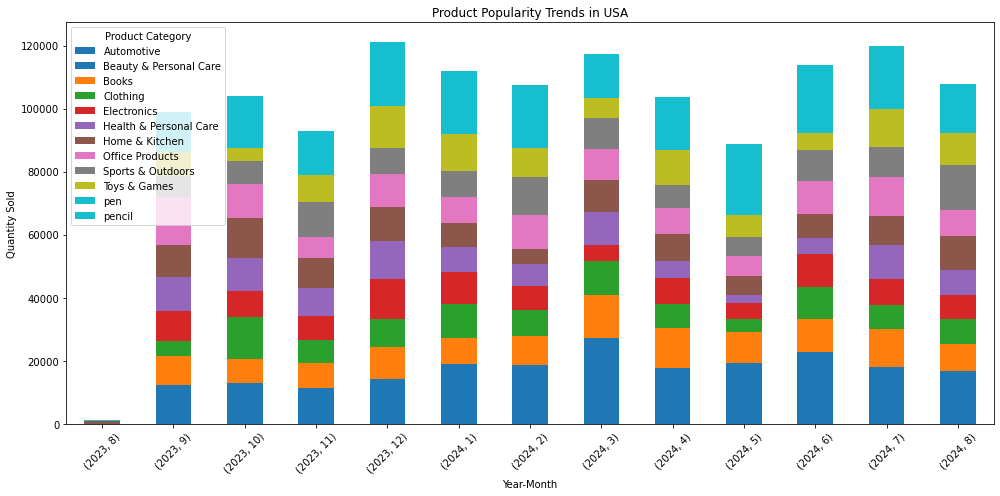

<Figure size 1008x504 with 0 Axes>

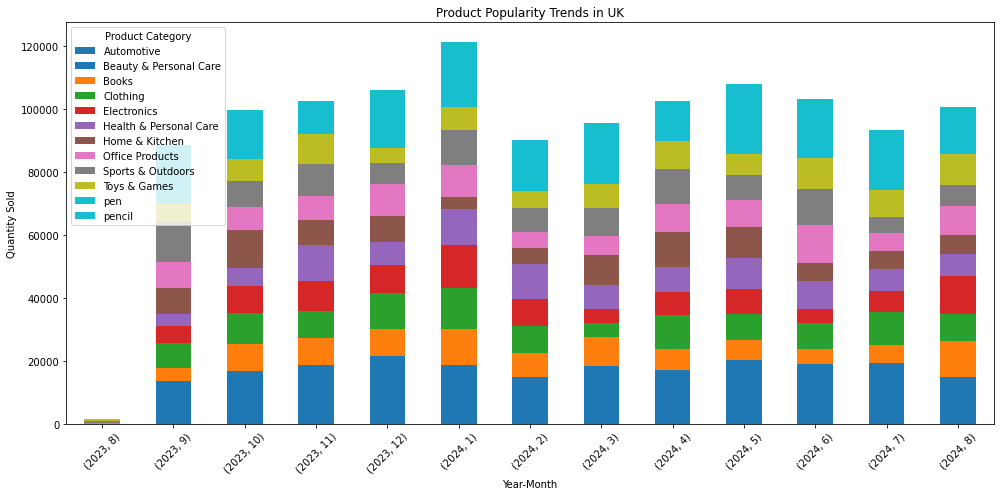

<Figure size 1008x504 with 0 Axes>

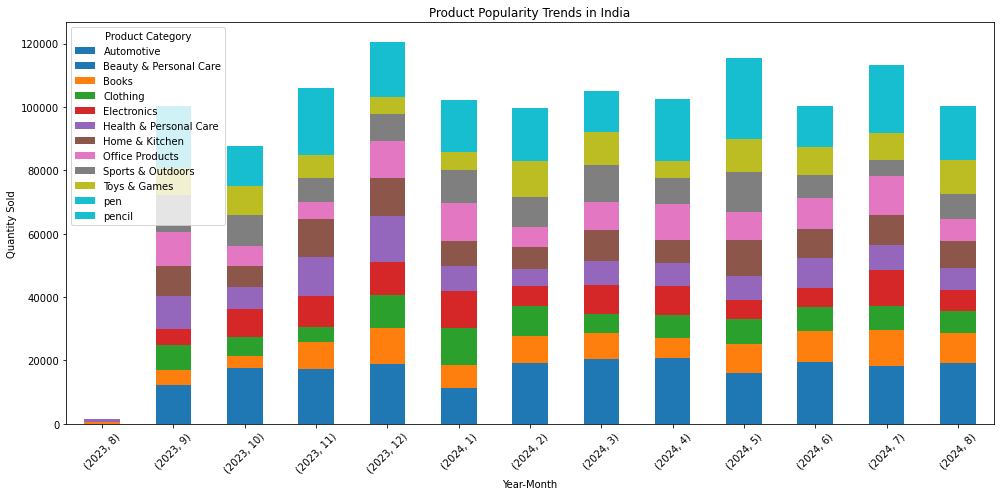

<Figure size 1008x504 with 0 Axes>

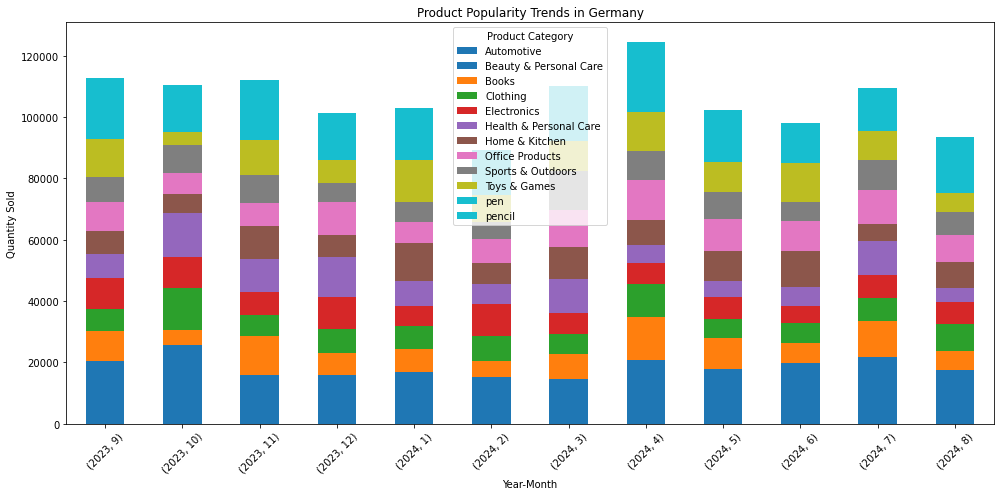

In [37]:
countries = updated_data['country'].unique()
for country in countries:
    country_data = monthly_sales[monthly_sales['country'] == country]
    
    plt.figure(figsize=(14, 7))
    
    # Pivot data for stacked bar chart
    pivot_data = country_data.pivot_table(index=['year', 'month'], columns='product_category', values='qty', fill_value=0)
    
    # Plot stacked bar chart
    pivot_data.plot(kind='bar', stacked=True, colormap='tab10', figsize=(14, 7))
    
    plt.title(f'Product Popularity Trends in {country}')
    plt.xlabel('Year-Month')
    plt.ylabel('Quantity Sold')
    plt.legend(title='Product Category')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 3.Which locations see the highest traffic of sales?

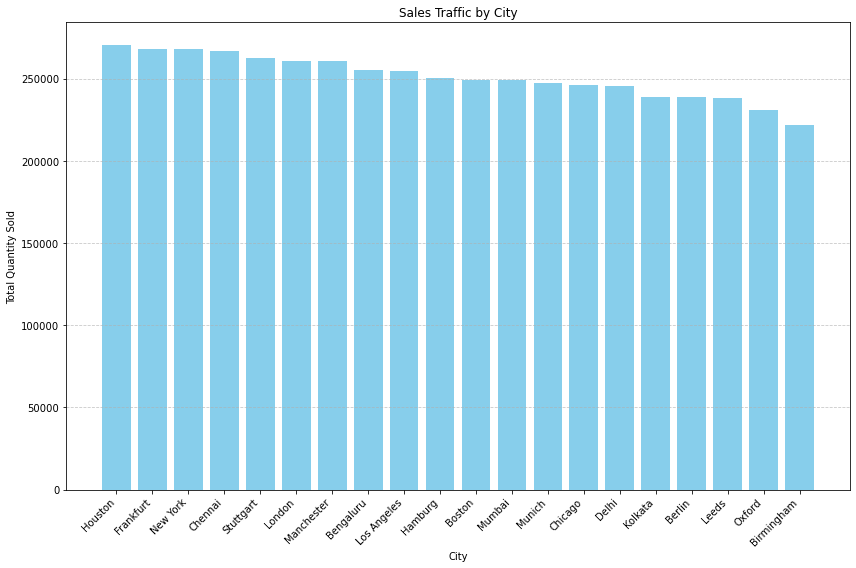

In [39]:
# Aggregate total quantity sold by city
city_sales = updated_data.groupby('city')['qty'].sum().reset_index()

# Sort the cities by total quantity sold in descending order
city_sales_sorted = city_sales.sort_values(by='qty', ascending=False)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.bar(city_sales_sorted['city'], city_sales_sorted['qty'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Total Quantity Sold')
plt.title('Sales Traffic by City')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [58]:
city_sales.columns = ['City', 'Total Quantity Sold']

# Display the results
print(city_sales)

           City  Total Quantity Sold
0     Bengaluru               255062
1        Berlin               238629
2    Birmingham               221543
3        Boston               248938
4       Chennai               266917
5       Chicago               246444
6         Delhi               245398
7     Frankfurt               268316
8       Hamburg               250331
9       Houston               270724
10      Kolkata               238841
11        Leeds               238339
12       London               261001
13  Los Angeles               254861
14   Manchester               260761
15       Mumbai               248932
16       Munich               247342
17     New York               268306
18       Oxford               231006
19    Stuttgart               262375


# 4.What times have the highest traffic of sales? Per Country?

In [60]:
# Extract hour and day of the week
updated_data['hour'] = updated_data['datetime'].dt.hour
updated_data['day_of_week'] = updated_data['datetime'].dt.day_name()

# Aggregate total quantity of sales by hour and country

In [63]:
hourly_sales = updated_data.groupby(['country', 'hour'])['qty'].sum().reset_index()

# Find the hour with the highest sales for each country
peak_hourly_sales = hourly_sales.loc[hourly_sales.groupby('country')['qty'].idxmax()]

print("\nPeak hour of sales per country:")
print(peak_hourly_sales)


Peak hour of sales per country:
    country  hour    qty
19  Germany    19  65527
25    India     1  62215
59       UK    11  62980
74      USA     2  59102


# Aggregate total quantity of sales by day of the week and country

In [64]:
daily_sales = updated_data.groupby(['country', 'day_of_week'])['qty'].sum().reset_index()

# Find the day with the highest sales for each country
peak_daily_sales = daily_sales.loc[daily_sales.groupby('country')['qty'].idxmax()]

print("\nPeak day of the week for sales per country:")
print(peak_daily_sales)


Peak day of the week for sales per country:
    country day_of_week     qty
2   Germany    Saturday  193553
9     India    Saturday  191006
18       UK    Thursday  190361
24      USA      Sunday  202507


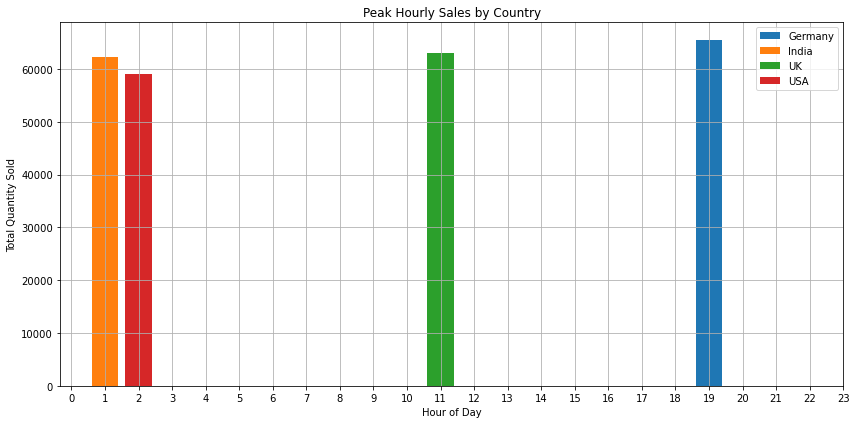

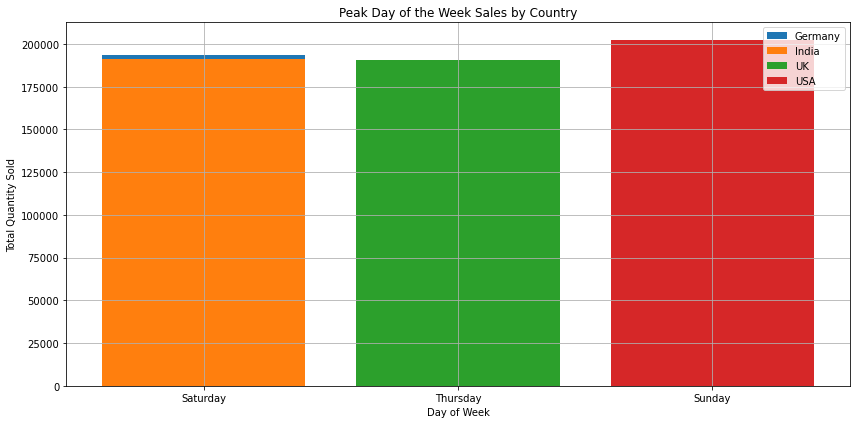

In [65]:
import matplotlib.pyplot as plt

# Visualize peak hourly sales
plt.figure(figsize=(12, 6))
for country in hourly_sales['country'].unique():
    country_data = peak_hourly_sales[peak_hourly_sales['country'] == country]
    plt.bar(country_data['hour'], country_data['qty'], label=country)

plt.title('Peak Hourly Sales by Country')
plt.xlabel('Hour of Day')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Visualize peak daily sales
plt.figure(figsize=(12, 6))
for country in daily_sales['country'].unique():
    country_data = peak_daily_sales[peak_daily_sales['country'] == country]
    plt.bar(country_data['day_of_week'], country_data['qty'], label=country)

plt.title('Peak Day of the Week Sales by Country')
plt.xlabel('Day of Week')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()